In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset= pd.read_excel("HPC.xlsx")
dataset.shape

(1048575, 9)

In [3]:
dataset.head()

Date      Time Global_active_power Global_reactive_power Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.84   
1 2006-12-16  17:25:00                5.36                 0.436  233.63   
2 2006-12-16  17:26:00               5.374                 0.498  233.29   
3 2006-12-16  17:27:00               5.388                 0.502  233.74   
4 2006-12-16  17:28:00               3.666                 0.528  235.68   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             18.4              0              1            17.0  
1               23              0              1            16.0  
2               23              0              2            17.0  
3               23              0              1            17.0  
4             15.8              0              1            17.0

In [4]:
df=dataset.sample(40000)
df.head()

Date      Time Global_active_power Global_reactive_power  \
1006109 2008-11-14  09:53:00               1.362                     0   
915224  2008-09-12  07:08:00               1.802                 0.114   
330536  2007-08-03  06:20:00               0.104                     0   
622490  2008-02-22  00:14:00               0.336                 0.112   
546023  2007-12-30  21:47:00               2.644                  0.11   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
1006109  236.29              5.8              0              0            17.0  
915224      239              7.4              0              2            18.0  
330536   238.75              0.4              0              0             0.0  
622490   245.85              1.4              0              0             0.0  
546023   237.35             11.2              1              1            17.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1006109 to 297719
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   40000 non-null  datetime64[ns]
 1   Time                   40000 non-null  object        
 2   Global_active_power    40000 non-null  object        
 3   Global_reactive_power  40000 non-null  object        
 4   Voltage                40000 non-null  object        
 5   Global_intensity       40000 non-null  object        
 6   Sub_metering_1         40000 non-null  object        
 7   Sub_metering_2         40000 non-null  object        
 8   Sub_metering_3         39853 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 3.1+ MB


In [6]:
#importing date time
import datetime as dt

In [7]:
#splitting date, month and year
df['Date']=pd.to_datetime(df['Date'])

In [8]:
df['date']=df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [9]:
df.head()

Date      Time Global_active_power Global_reactive_power  \
1006109 2008-11-14  09:53:00               1.362                     0   
915224  2008-09-12  07:08:00               1.802                 0.114   
330536  2007-08-03  06:20:00               0.104                     0   
622490  2008-02-22  00:14:00               0.336                 0.112   
546023  2007-12-30  21:47:00               2.644                  0.11   

        Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
1006109  236.29              5.8              0              0   
915224      239              7.4              0              2   
330536   238.75              0.4              0              0   
622490   245.85              1.4              0              0   
546023   237.35             11.2              1              1   

         Sub_metering_3  date  month  year  
1006109            17.0    14     11  2008  
915224             18.0    12      9  2008  
330536              0.0     3      8  2007  
622490              0.0    22      2  2008  
546023             17.0    30     12  2007

In [10]:
#splitting hous,minutes and seconds
df['hour']=pd.to_datetime(df['Time'],format='%H:%M:%S').dt.hour
df['minutes']=pd.to_datetime(df['Time'],format='%H:%M:%S').dt.minute

In [11]:
df.replace('?',np.nan, inplace=True)
df.replace(',',np.nan, inplace=True)
df.replace(' ',np.nan, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1006109 to 297719
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   40000 non-null  datetime64[ns]
 1   Time                   40000 non-null  object        
 2   Global_active_power    39853 non-null  float64       
 3   Global_reactive_power  39853 non-null  float64       
 4   Voltage                39853 non-null  float64       
 5   Global_intensity       39853 non-null  float64       
 6   Sub_metering_1         39853 non-null  float64       
 7   Sub_metering_2         39853 non-null  float64       
 8   Sub_metering_3         39853 non-null  float64       
 9   date                   40000 non-null  int64         
 10  month                  40000 non-null  int64         
 11  year                   40000 non-null  int64         
 12  hour                   40000 non-null  int64         

In [13]:
df.isnull().sum()

Date                       0
Time                       0
Global_active_power      147
Global_reactive_power    147
Voltage                  147
Global_intensity         147
Sub_metering_1           147
Sub_metering_2           147
Sub_metering_3           147
date                       0
month                      0
year                       0
hour                       0
minutes                    0
dtype: int64

In [14]:
#replacing null values with mean
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'date', 'month', 'year', 'hour', 'minutes'],
      dtype='object')

In [15]:
df['Global_active_power']=df['Global_active_power'].fillna(df['Global_active_power'].mean())

In [16]:
df['Global_reactive_power']=df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean())
df['Voltage']=df['Voltage'].fillna(df['Voltage'].mean())
df['Global_intensity']=df['Global_intensity'].fillna(df['Global_intensity'].mean())
df['Sub_metering_1']=df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean())
df['Sub_metering_2']=df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean())
df['Sub_metering_3']=df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean())

In [17]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
date                     0
month                    0
year                     0
hour                     0
minutes                  0
dtype: int64

In [18]:
#making a total metering column
df['Total_metering']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [19]:
df.head()

Date      Time  Global_active_power  Global_reactive_power  \
1006109 2008-11-14  09:53:00                1.362                  0.000   
915224  2008-09-12  07:08:00                1.802                  0.114   
330536  2007-08-03  06:20:00                0.104                  0.000   
622490  2008-02-22  00:14:00                0.336                  0.112   
546023  2007-12-30  21:47:00                2.644                  0.110   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1006109   236.29               5.8             0.0             0.0   
915224    239.00               7.4             0.0             2.0   
330536    238.75               0.4             0.0             0.0   
622490    245.85               1.4             0.0             0.0   
546023    237.35              11.2             1.0             1.0   

         Sub_metering_3  date  month  year  hour  minutes  Total_metering  
1006109            17.0    14     11  2008     9       53            17.0  
915224             18.0    12      9  2008     7        8            20.0  
330536              0.0     3      8  2007     6       20             0.0  
622490              0.0    22      2  2008     0       14             0.0  
546023             17.0    30     12  2007    21       47            19.0

In [20]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         40000.000000           40000.000000  40000.000000   
mean              1.109831               0.118709    239.932525   
std               1.126064               0.109522      3.286354   
min               0.078000               0.000000    224.870000   
25%               0.290000               0.000000    237.970000   
50%               0.566000               0.098000    240.160000   
75%               1.540000               0.186000    242.110000   
max               8.960000               1.014000    251.340000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      40000.000000    40000.000000    40000.000000    40000.000000   
mean           4.725652        1.194088        1.507490        5.931850   
std            4.749501        6.366746        6.433382        8.195889   
min            0.200000        0.000000        0.000000        0.000000   
25%            1.200000        0.000000        0.000000        0.000000   
50%            2.600000        0.000000        0.000000        0.000000   
75%            6.400000        0.000000        1.000000       17.000000   
max           38.800000       78.000000       78.000000       31.000000   

               date         month          year          hour       minutes  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean      15.798075      6.501175   2007.456975     11.461925     29.563675   
std        8.844942      3.430582      0.539403      6.886199     17.294404   
min        1.000000      1.000000   2006.000000      0.000000      0.000000   
25%        8.000000      4.000000   2007.000000      6.000000     15.000000   
50%       16.000000      7.000000   2007.000000     11.000000     30.000000   
75%       23.000000      9.000000   2008.000000     17.000000     44.000000   
max       31.000000     12.000000   2008.000000     23.000000     59.000000   

       Total_metering  
count    40000.000000  
mean         8.633428  
std         13.273413  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%         18.000000  
max        129.000000

In [21]:
#dropping redundant columns
df_new= df.drop(columns=['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'])

In [22]:
df_new.head()

Global_active_power  Global_reactive_power  Voltage  \
1006109                1.362                  0.000   236.29   
915224                 1.802                  0.114   239.00   
330536                 0.104                  0.000   238.75   
622490                 0.336                  0.112   245.85   
546023                 2.644                  0.110   237.35   

         Global_intensity  date  month  year  hour  minutes  Total_metering  
1006109               5.8    14     11  2008     9       53            17.0  
915224                7.4    12      9  2008     7        8            20.0  
330536                0.4     3      8  2007     6       20             0.0  
622490                1.4    22      2  2008     0       14             0.0  
546023               11.2    30     12  2007    21       47            19.0

In [23]:
df_new.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'date', 'month', 'year', 'hour', 'minutes',
       'Total_metering'],
      dtype='object')

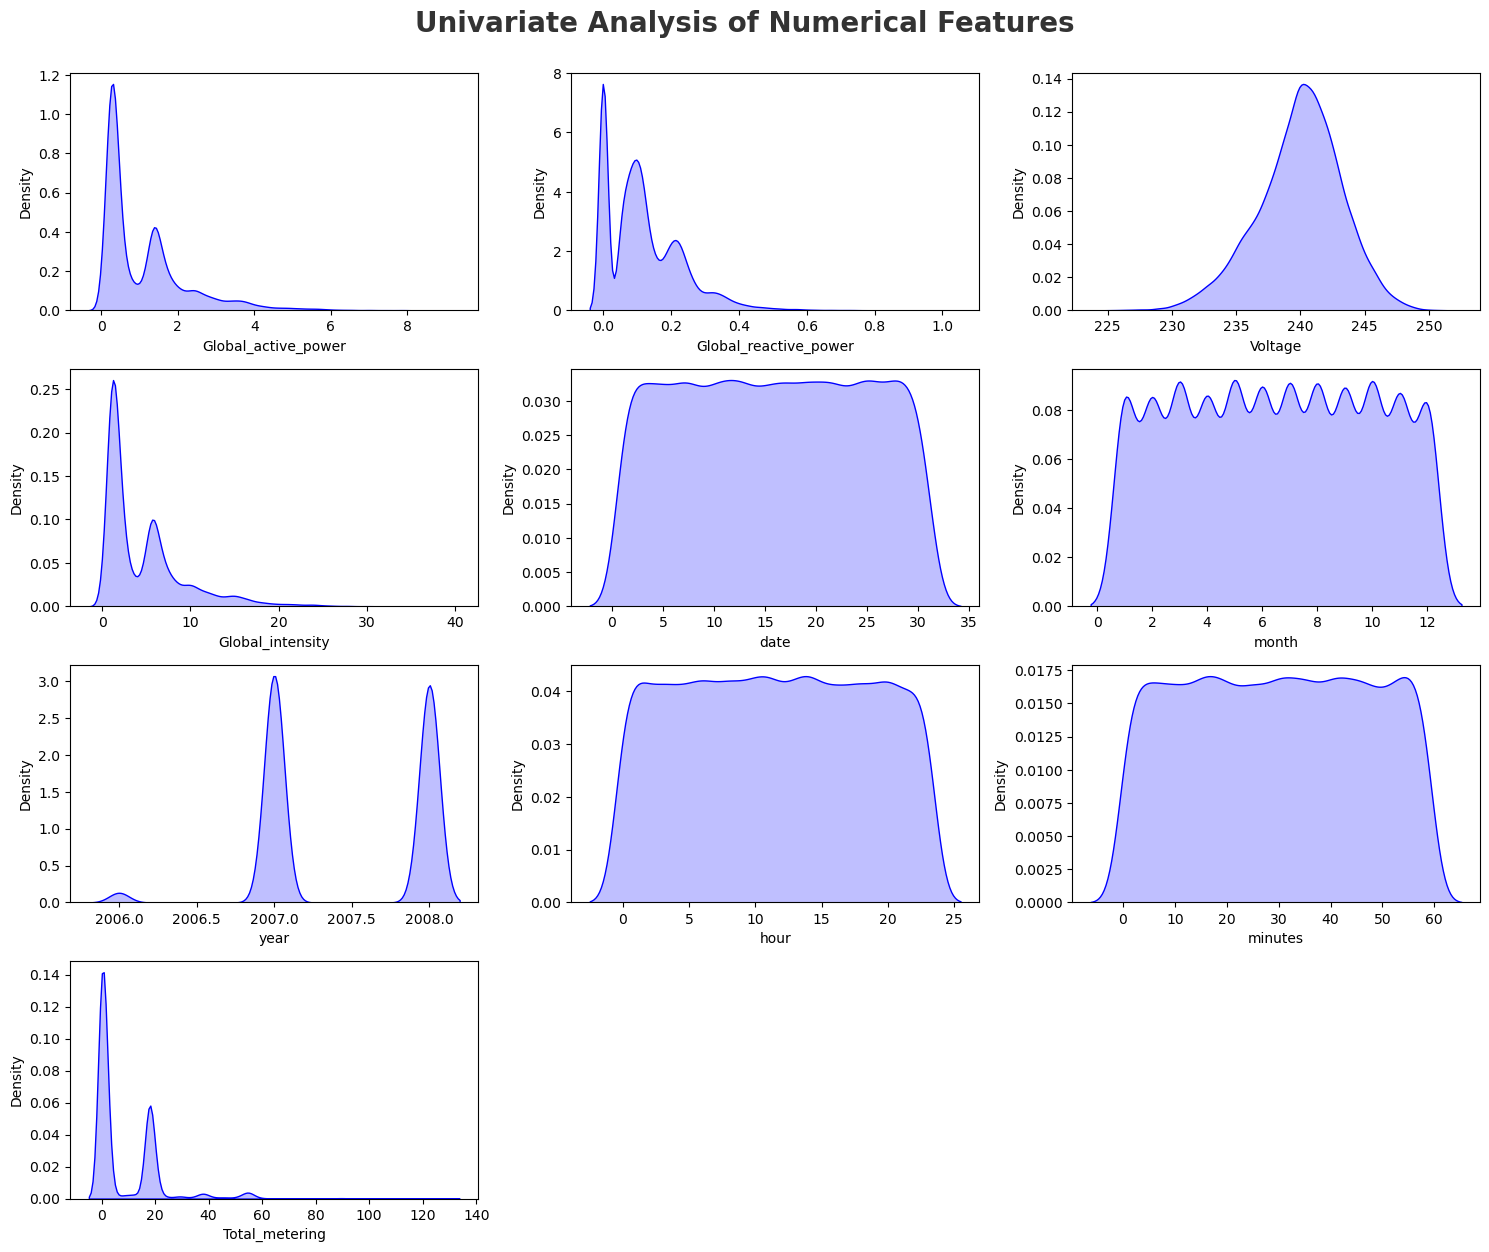

In [24]:

plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for j,i in enumerate(df_new):
    plt.subplot(5,3,j+1)
    sns.kdeplot(x=df_new[i],shade=True, color='b')
    plt.tight_layout()

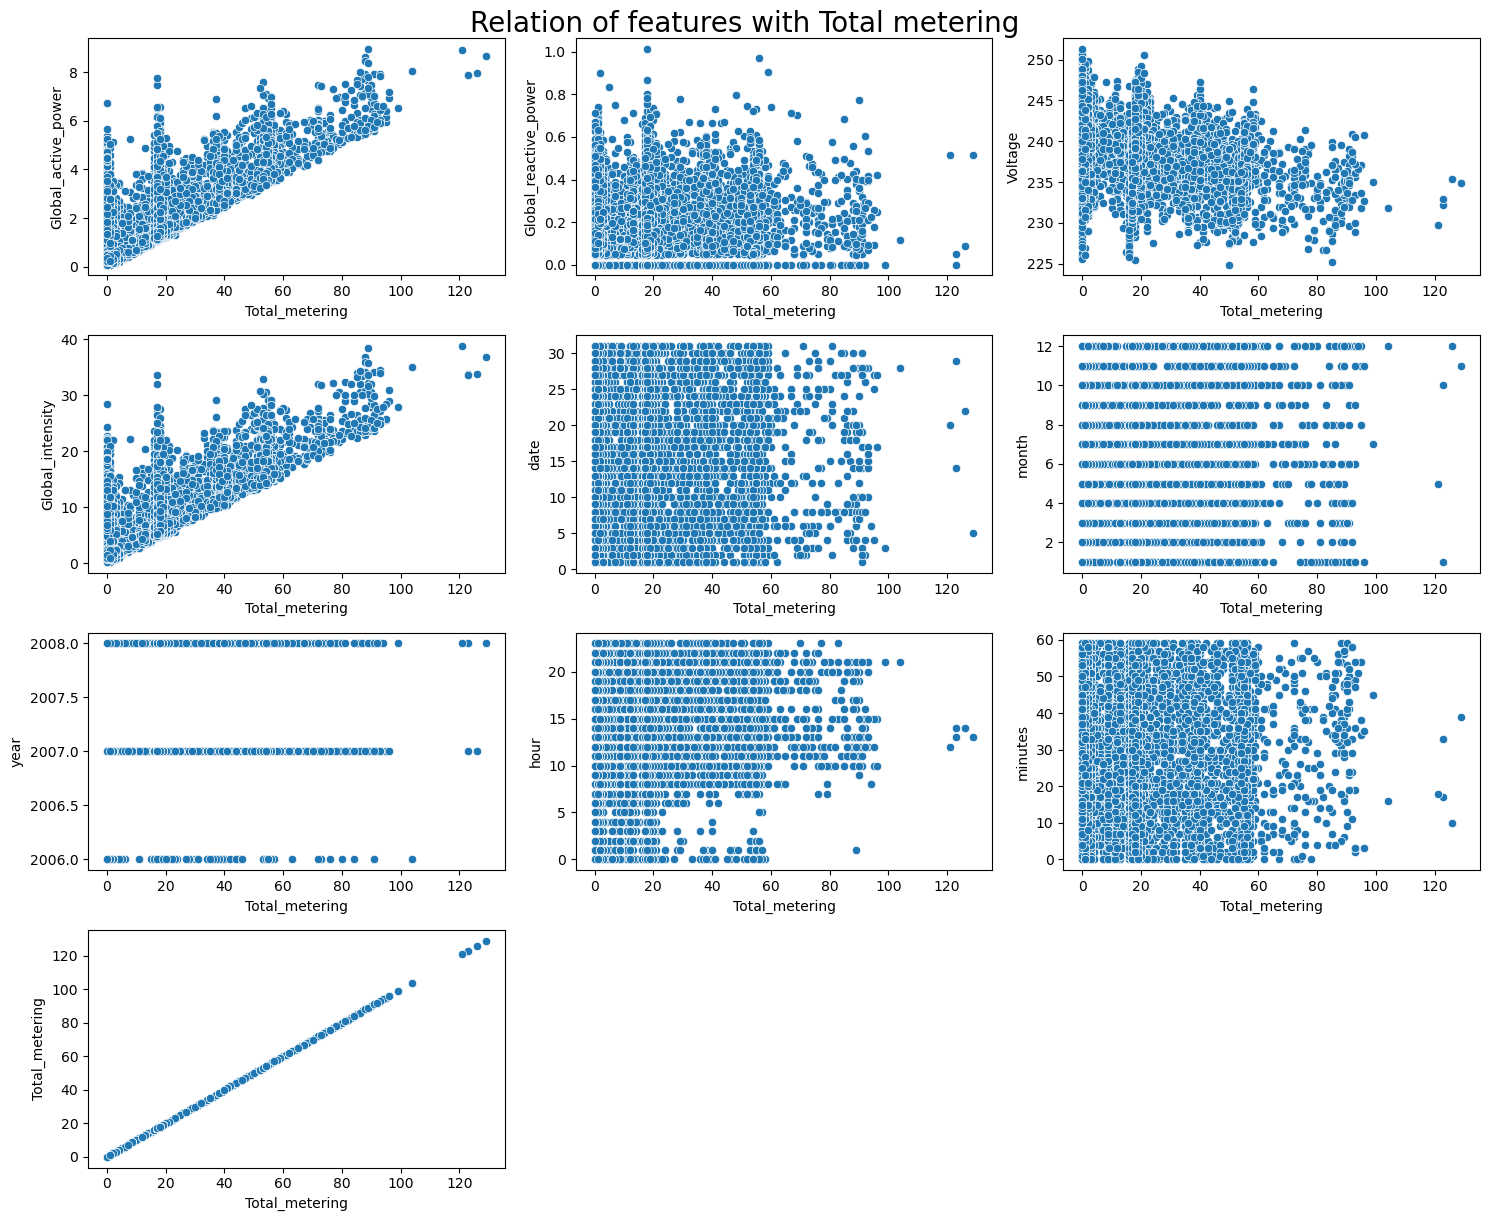

In [25]:
plt.figure(figsize=(15,15))
plt.suptitle('Relation of features with Total metering', fontsize=20)
for i in range(0, len(df_new.columns)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(x=df_new['Total_metering'], y=df_new[df_new.columns[i]])
    plt.ylabel(df_new.columns[i])
    plt.xlabel('Total_metering')
    plt.tight_layout()

<AxesSubplot:xlabel='hour', ylabel='Total_metering'>

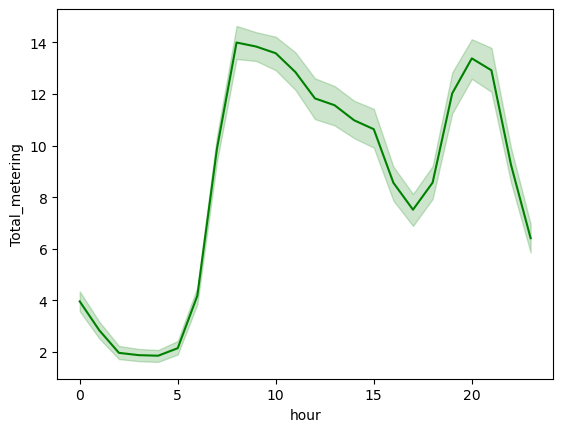

In [26]:
sns.lineplot(x='hour',y='Total_metering',data=df_new,color='green')

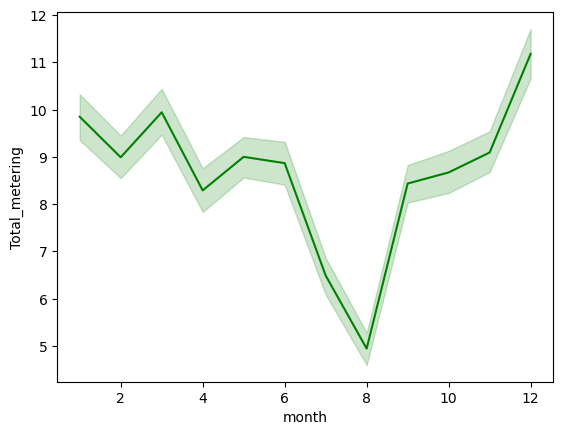

In [27]:
sns.lineplot(x='month', y='Total_metering', data=df_new, color = 'green');


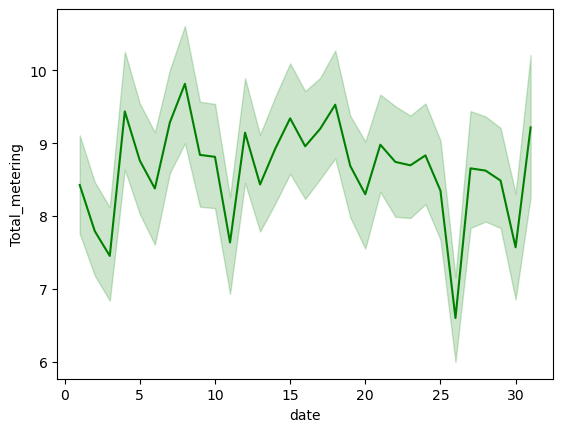

In [28]:
sns.lineplot(x='date', y='Total_metering', data=df_new, color = 'green');

<AxesSubplot:xlabel='year', ylabel='Total_metering'>

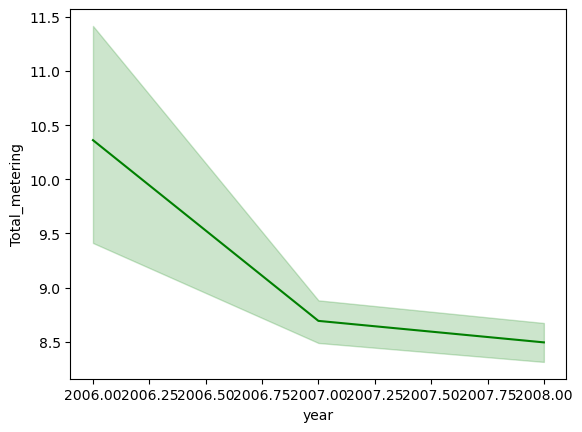

In [29]:
sns.lineplot(x='year', y='Total_metering', data=df_new, color = 'green')

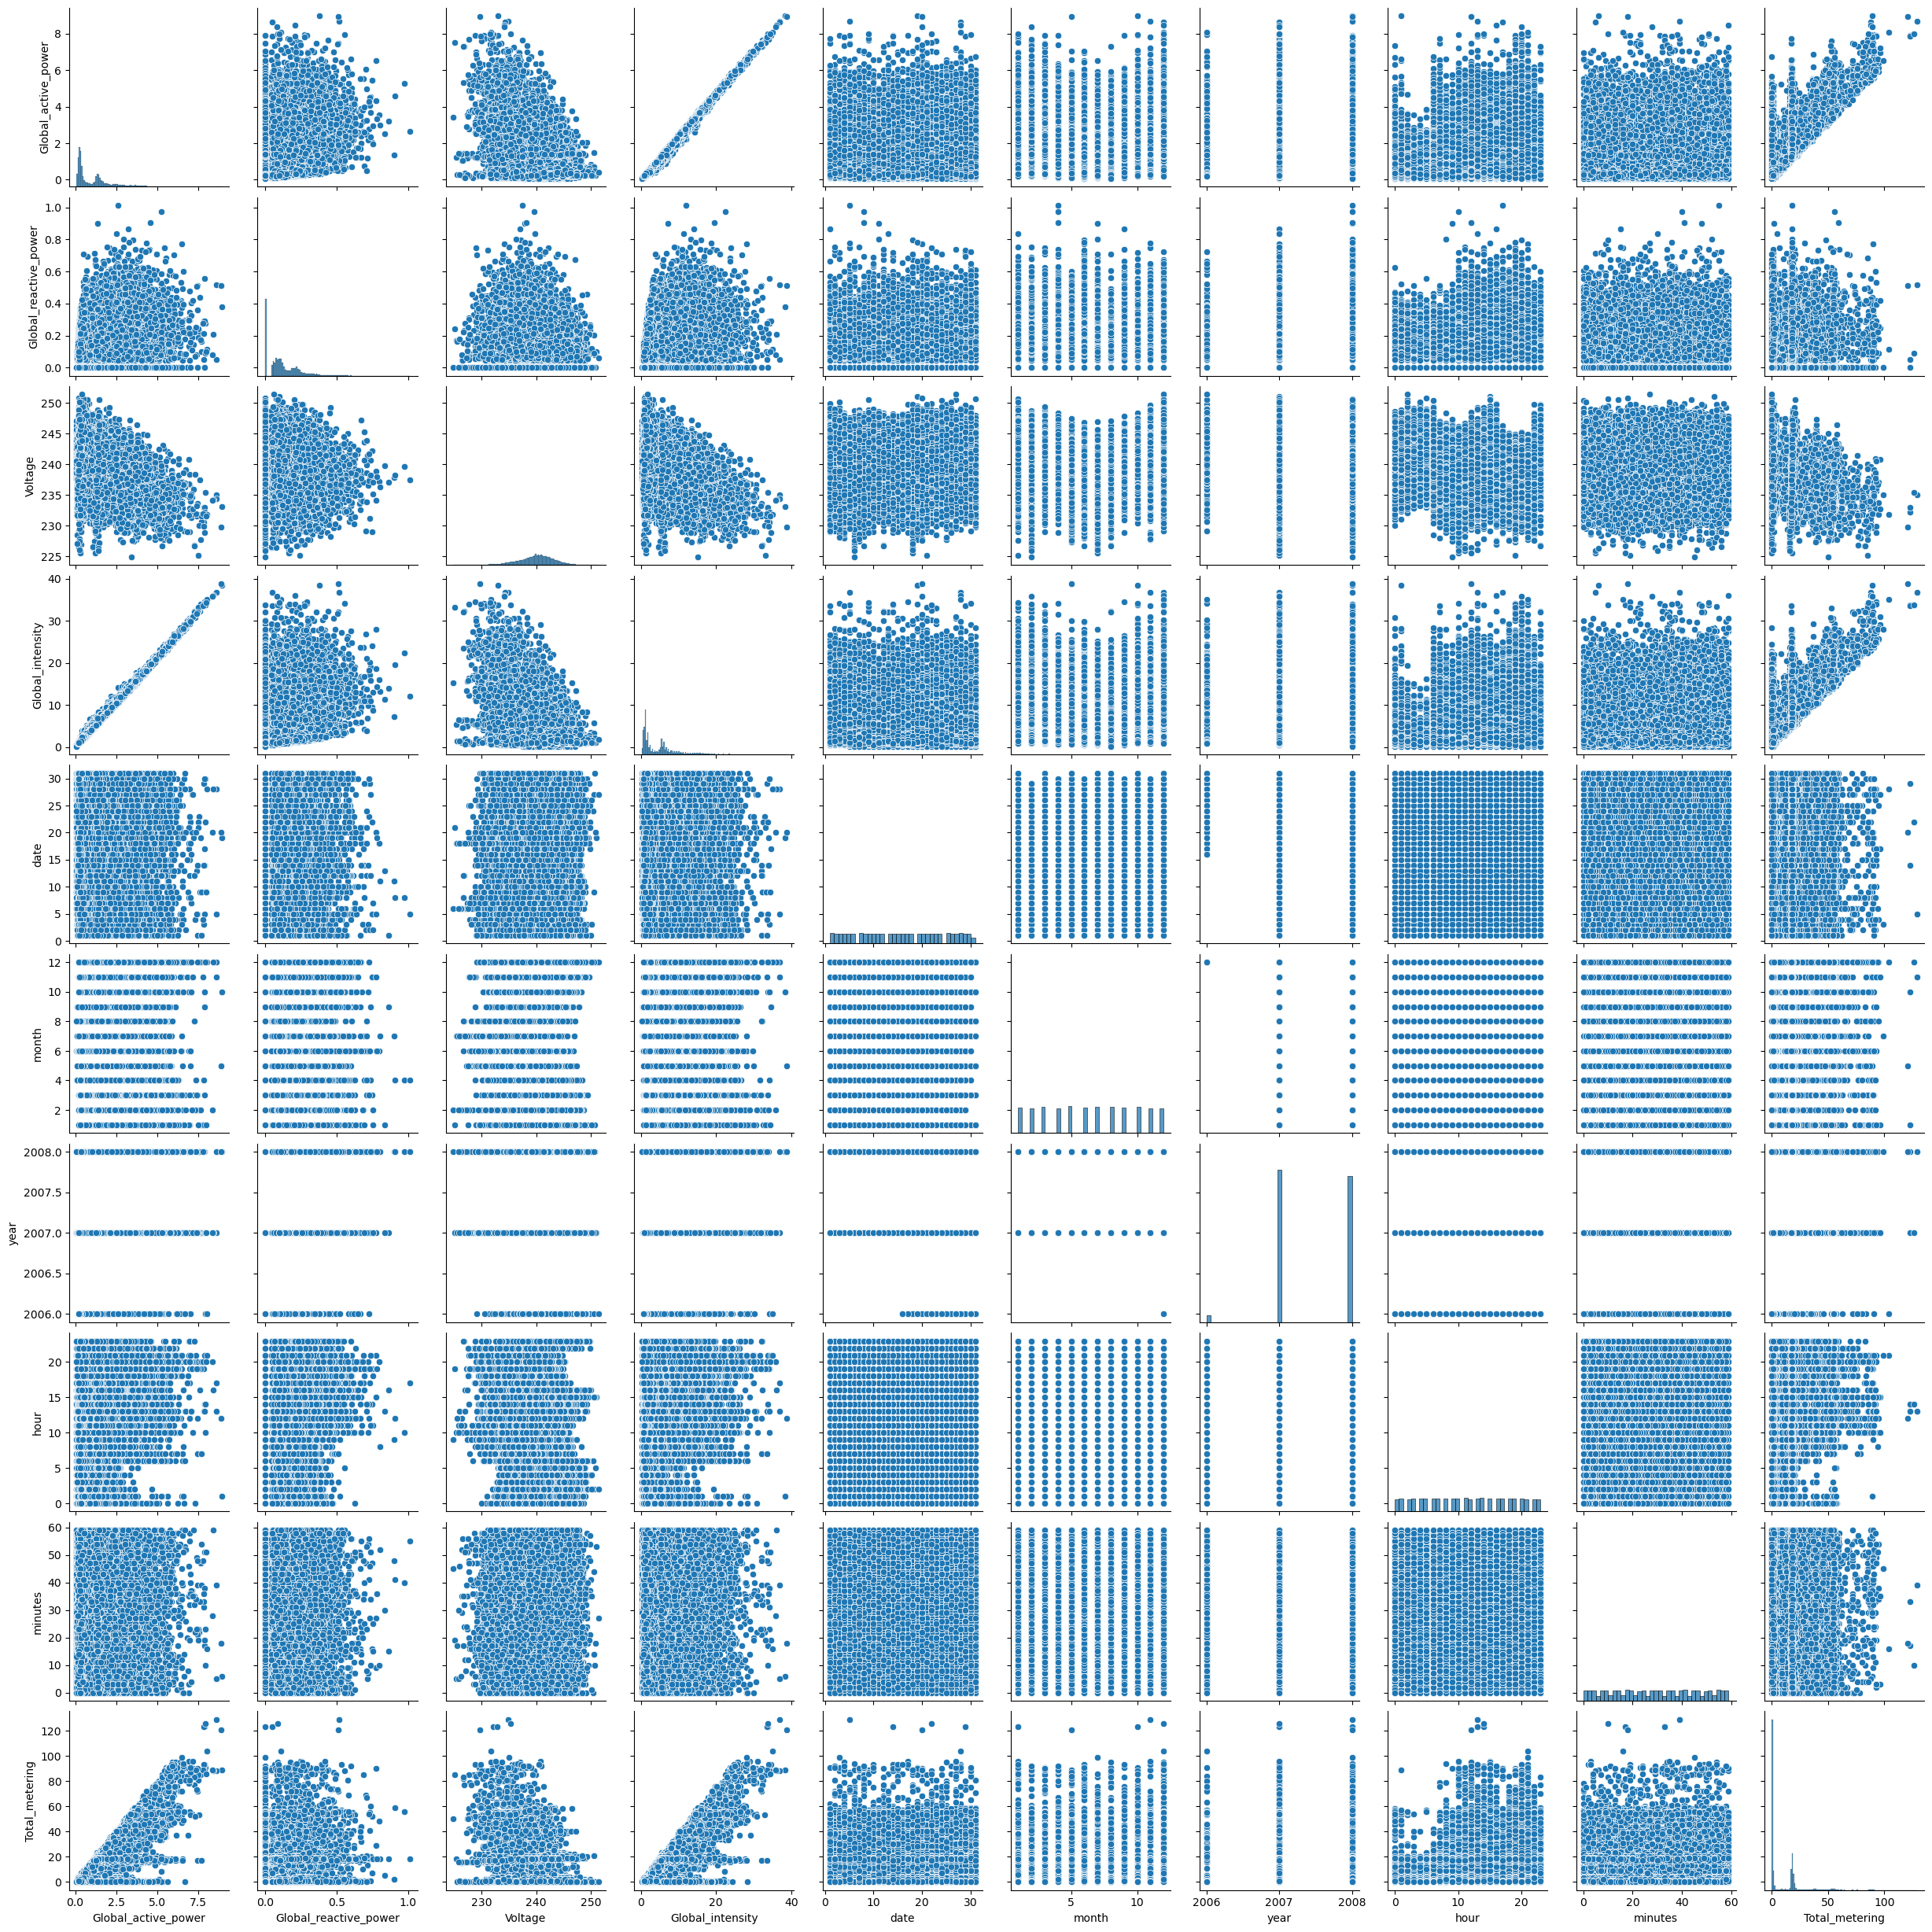

In [30]:
sns.pairplot(df_new)

<AxesSubplot:>

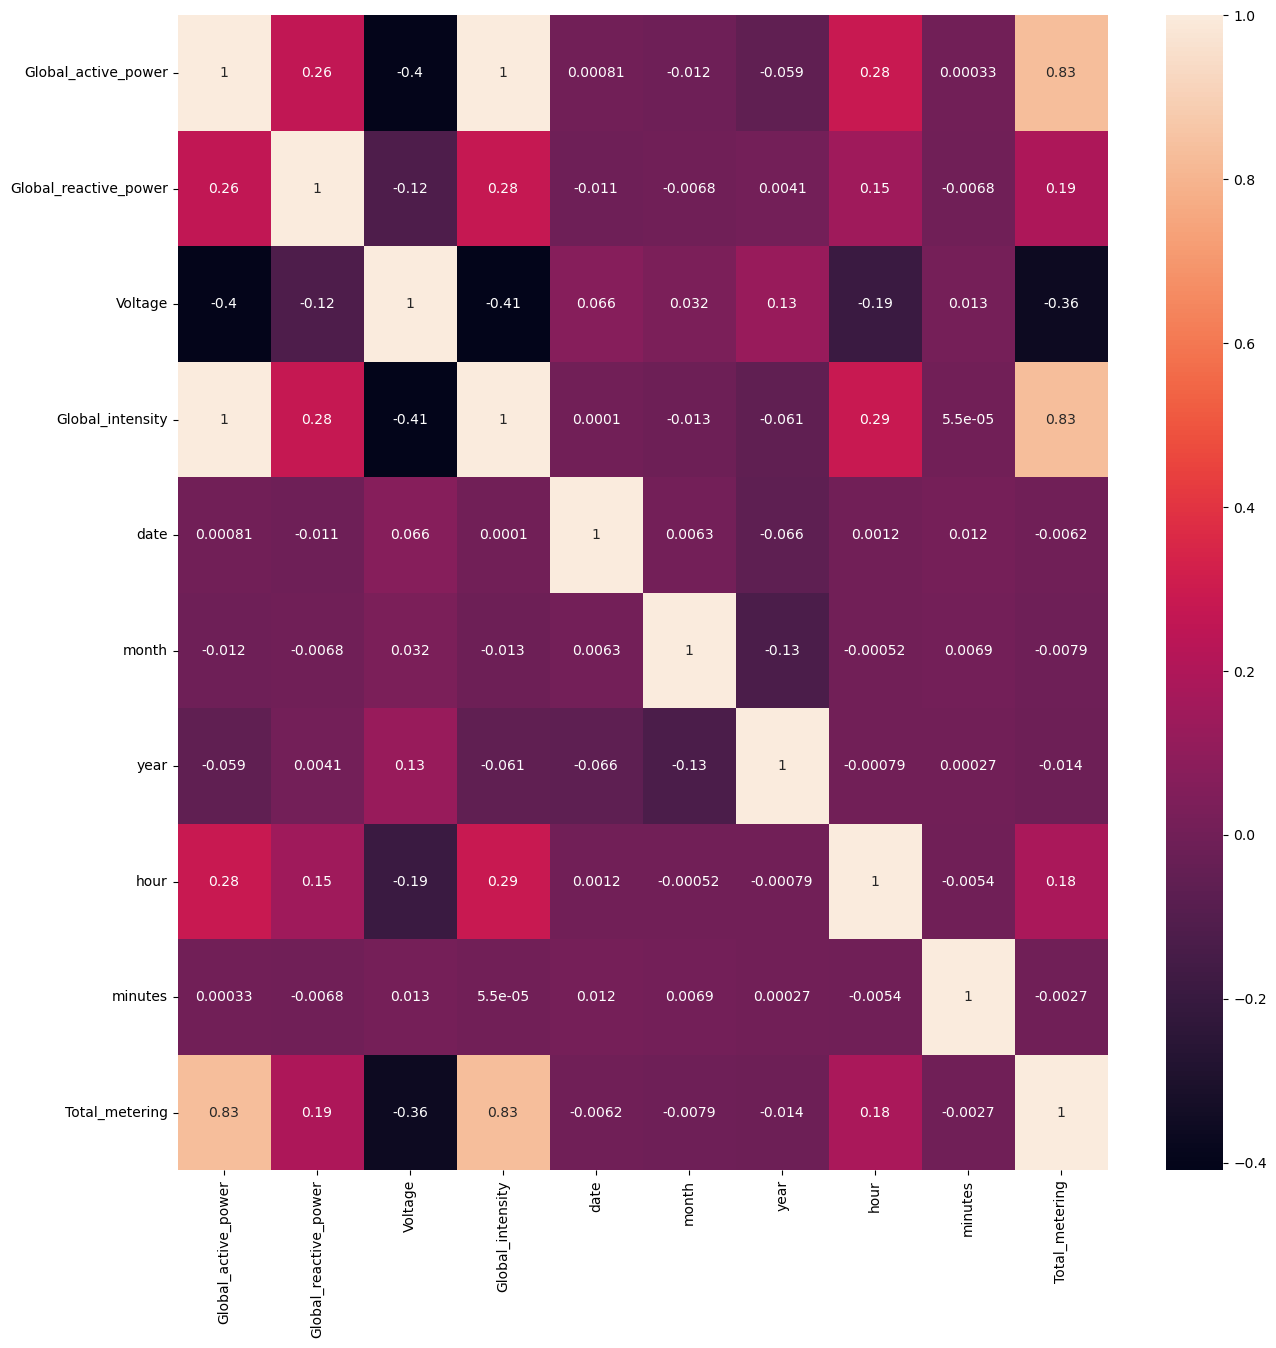

In [31]:
#checking correlation
plt.figure(figsize=(15,15))
sns.heatmap(data=df_new.corr(), annot=True)

In [32]:
## dropping Global_Active_power and year feature from data due to multicollinearity
df_new.drop(columns=['Global_active_power', 'year'], axis=1, inplace=True)

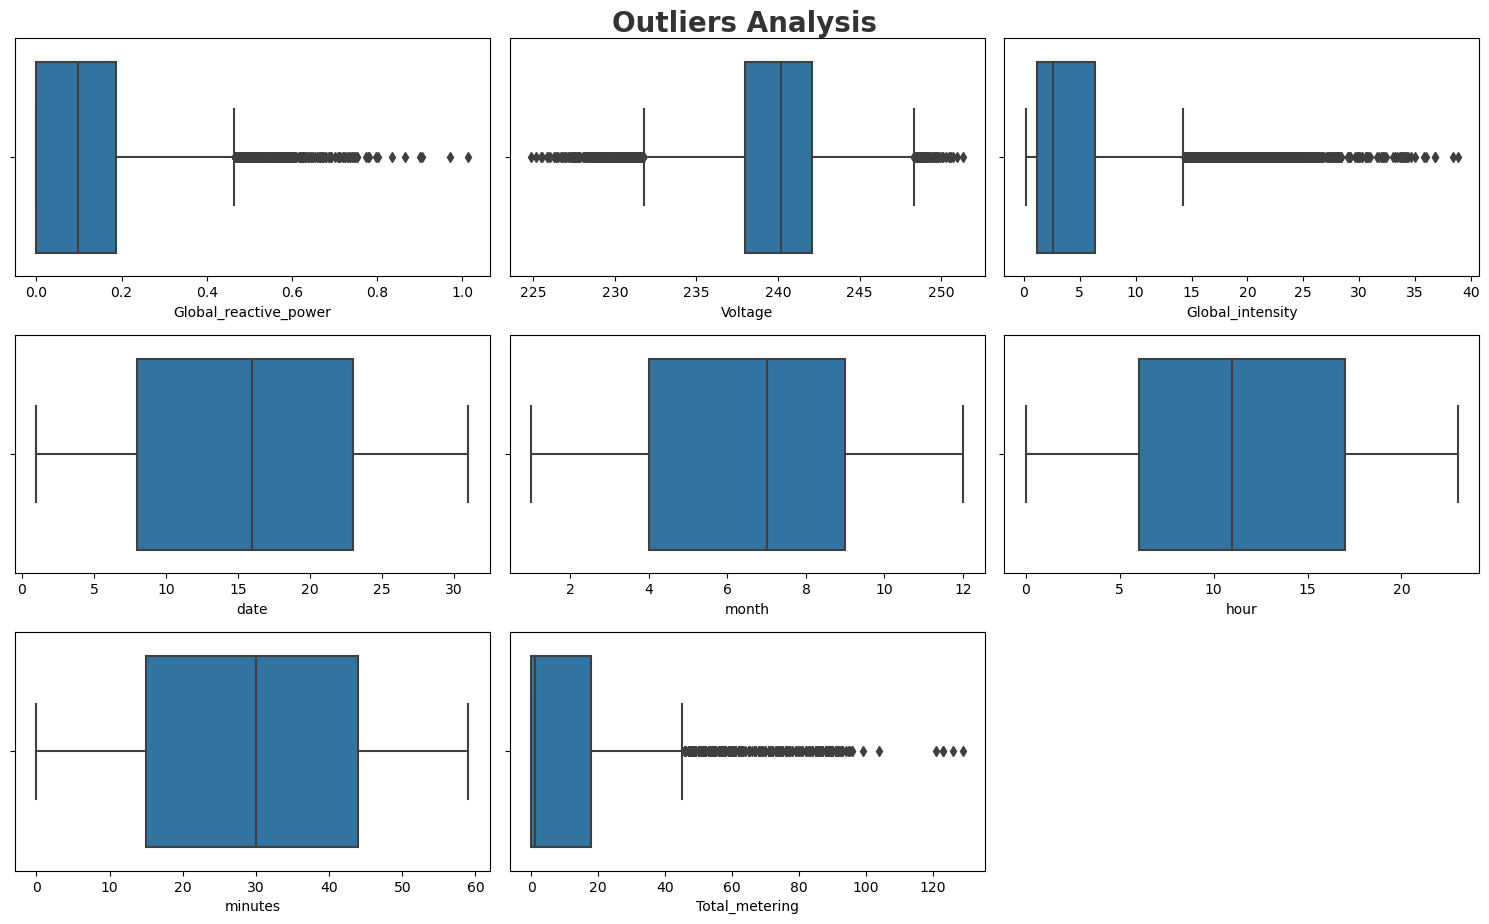

In [33]:
## Checking for outliers
plt.figure(figsize=(15,15))
plt.suptitle("Outliers Analysis",fontsize = 20, fontweight = 'bold', alpha= 0.8)
for i in range(0, len(df_new.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df_new[df_new.columns[i]])
    plt.tight_layout()

In [34]:
##conda install -c conda-forge feature_engine


In [35]:
#purging outliers
from feature_engine.outliers import Winsorizer

In [36]:
winsorizer = Winsorizer(capping_method = 'iqr',tail = 'both',fold = 1.5,variables = ['Global_reactive_power'])
df_new['Global_reactive_power'] = winsorizer.fit_transform(df_new[['Global_reactive_power']])
df_new

Global_reactive_power  Voltage  Global_intensity  date  month  hour  \
1006109                  0.000   236.29               5.8    14     11     9   
915224                   0.114   239.00               7.4    12      9     7   
330536                   0.000   238.75               0.4     3      8     6   
622490                   0.112   245.85               1.4    22      2     0   
546023                   0.110   237.35              11.2    30     12    21   
...                        ...      ...               ...   ...    ...   ...   
270246                   0.104   237.44               5.2    22      6     9   
751542                   0.088   239.90              10.4    21      5    15   
593821                   0.112   246.23               1.4     2      2     2   
587208                   0.000   239.19               9.4    28      1    12   
297719                   0.100   238.99               1.0    11      7    11   

         minutes  Total_metering  
1006109       53            17.0  
915224         8            20.0  
330536        20             0.0  
622490        14             0.0  
546023        47            19.0  
...          ...             ...  
270246        30            17.0  
751542         6            40.0  
593821        25             0.0  
587208        12            18.0  
297719        23             1.0  

[40000 rows x 8 columns]

In [37]:
winsorizer = Winsorizer(capping_method = 'iqr',tail = 'both',fold = 1.5,variables = ['Voltage'])
df_new['Voltage'] = winsorizer.fit_transform(df_new[['Voltage']])

In [38]:
winsorizer = Winsorizer(capping_method = 'iqr',tail = 'both',fold = 1.5,variables = ['Global_intensity'])
df_new['Global_intensity'] = winsorizer.fit_transform(df_new[['Global_intensity']])

In [39]:
winsorizer = Winsorizer(capping_method = 'iqr',tail = 'both',fold = 1.5,variables = ['Total_metering'])
df_new['Total_metering'] = winsorizer.fit_transform(df_new[['Total_metering']])

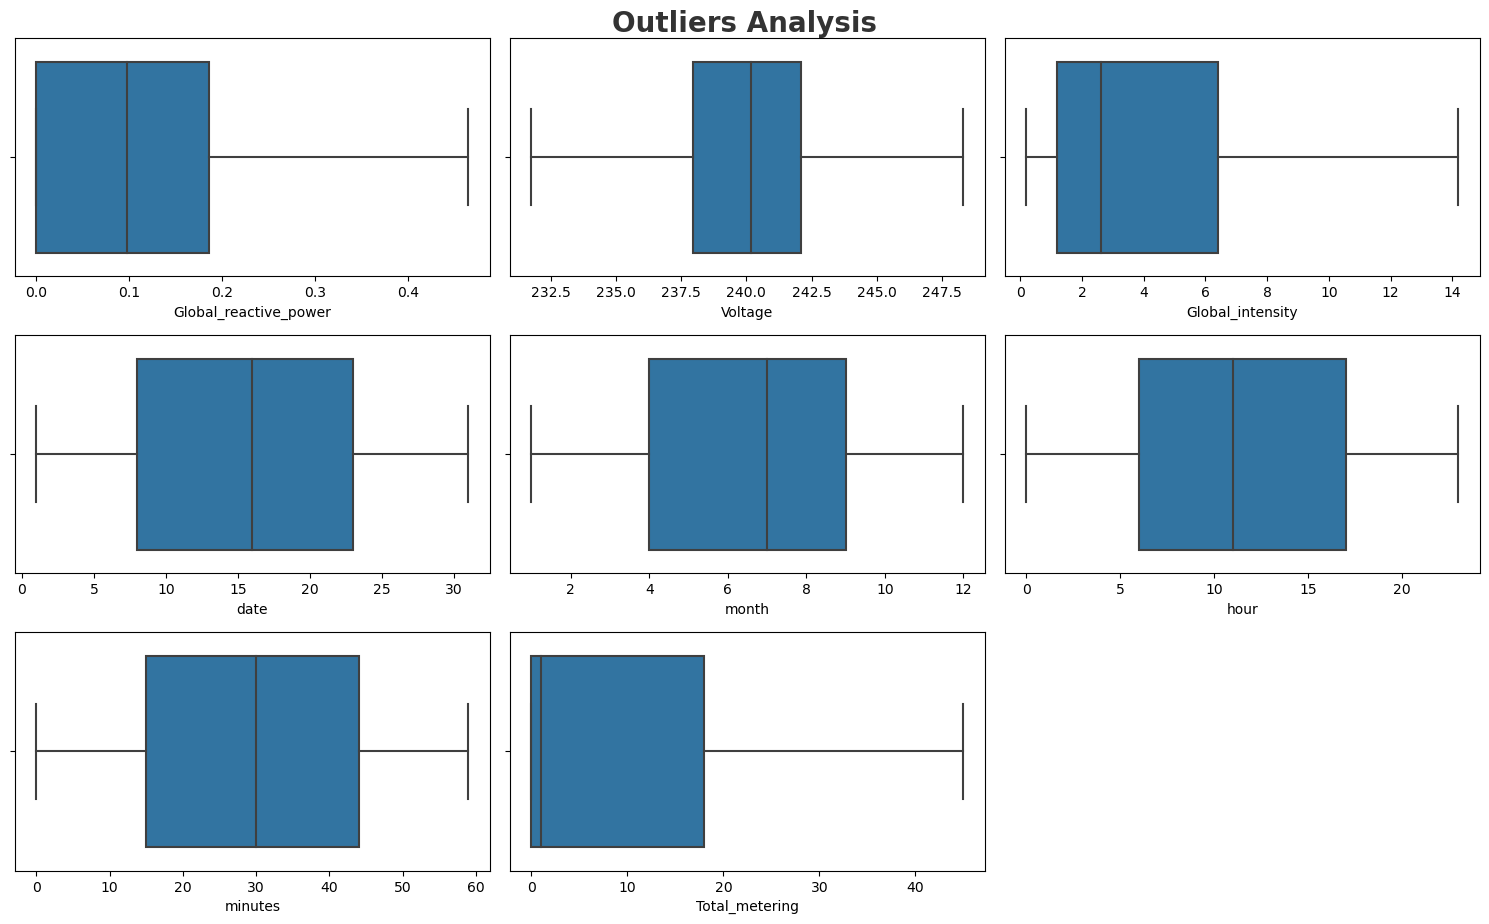

In [40]:
plt.figure(figsize=(15,15))
plt.suptitle("Outliers Analysis",fontsize = 20, fontweight = 'bold', alpha= 0.8)
for i in range(0, len(df_new.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(df_new[df_new.columns[i]])
    plt.tight_layout()

In [41]:
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
date                              int64
month                             int64
year                              int64
hour                              int64
minutes                           int64
Total_metering                  float64
dtype: object

In [42]:
#splitting data into dependent and independent data
X=df_new.drop('Total_metering',axis=1)
X.head()

Global_reactive_power  Voltage  Global_intensity  date  month  hour  \
1006109                  0.000   236.29               5.8    14     11     9   
915224                   0.114   239.00               7.4    12      9     7   
330536                   0.000   238.75               0.4     3      8     6   
622490                   0.112   245.85               1.4    22      2     0   
546023                   0.110   237.35              11.2    30     12    21   

         minutes  
1006109       53  
915224         8  
330536        20  
622490        14  
546023        47

In [43]:
y=df_new['Total_metering']

In [44]:
#Splitting the test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train.head()

Global_reactive_power  Voltage  Global_intensity  date  month  hour  \
147315                  0.146   245.64               1.6    29      3     0   
202727                  0.188   233.64               3.0     6      5    12   
16549                   0.176   247.98               1.4    28     12     5   
936316                  0.268   241.09               5.4    26      9    22   
403407                  0.136   239.72               3.6    22      9    20   

        minutes  
147315       39  
202727       11  
16549        13  
936316       40  
403407       51

In [46]:
y_train.head()

147315    0.0
202727    1.0
16549     0.0
936316    1.0
403407    1.0
Name: Total_metering, dtype: float64

In [47]:
##standardizing data
from sklearn.preprocessing import StandardScaler
slr=StandardScaler()

In [48]:
X_train=slr.fit_transform(X_train)
X_train

array([[ 0.2730304 ,  1.75567559, -0.71385685, ..., -1.02360329,
        -1.65981604,  0.54081845],
       [ 0.66923505, -1.95313602, -0.36609739, ..., -0.44138717,
         0.08167007, -1.07461887],
       [ 0.55603373,  2.47889385, -0.76353677, ...,  1.59636926,
        -0.93419683, -0.95923049],
       ...,
       [ 1.38617681,  1.11281491,  0.57782115, ...,  1.3052612 ,
         1.53290849,  0.07926493],
       [-0.16090803, -0.20072253,  0.27974161, ..., -0.44138717,
        -0.78907299,  0.2523475 ],
       [ 0.04662774,  0.85628878,  1.42237984, ..., -1.02360329,
        -0.78907299,  1.46392549]])

In [49]:
X_test=slr.transform(X_test)


## DT Regression

In [50]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()

In [51]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
model.score(X_train,y_train)

1.0

In [53]:
#Using model to predict the op for test data
Y_pred=model.predict(X_test)

[Text(0.5, 0.9166666666666666, 'X[2] <= 0.106\nsquared_error = 132.026\nsamples = 26800\nvalue = 8.136'),
 Text(0.25, 0.75, 'X[2] <= 0.007\nsquared_error = 4.493\nsamples = 15814\nvalue = 0.905'),
 Text(0.125, 0.5833333333333334, 'X[2] <= -0.292\nsquared_error = 2.284\nsamples = 15428\nvalue = 0.731'),
 Text(0.0625, 0.4166666666666667, 'X[0] <= 0.169\nsquared_error = 0.834\nsamples = 14506\nvalue = 0.588'),
 Text(0.03125, 0.25, 'X[0] <= -0.453\nsquared_error = 0.576\nsamples = 10406\nvalue = 0.404'),
 Text(0.015625, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.046875, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.09375, 0.25, 'X[0] <= 1.131\nsquared_error = 1.184\nsamples = 4100\nvalue = 1.054'),
 Text(0.078125, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.109375, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1875, 0.4166666666666667, 'X[5] <= -0.862\nsquared_error = 19.657\nsamples = 922\nvalue = 2.993'),
 Text(0.15625, 0.25, 'X[0] <= 0.565\nsquared_error = 32.363\nsamples = 142

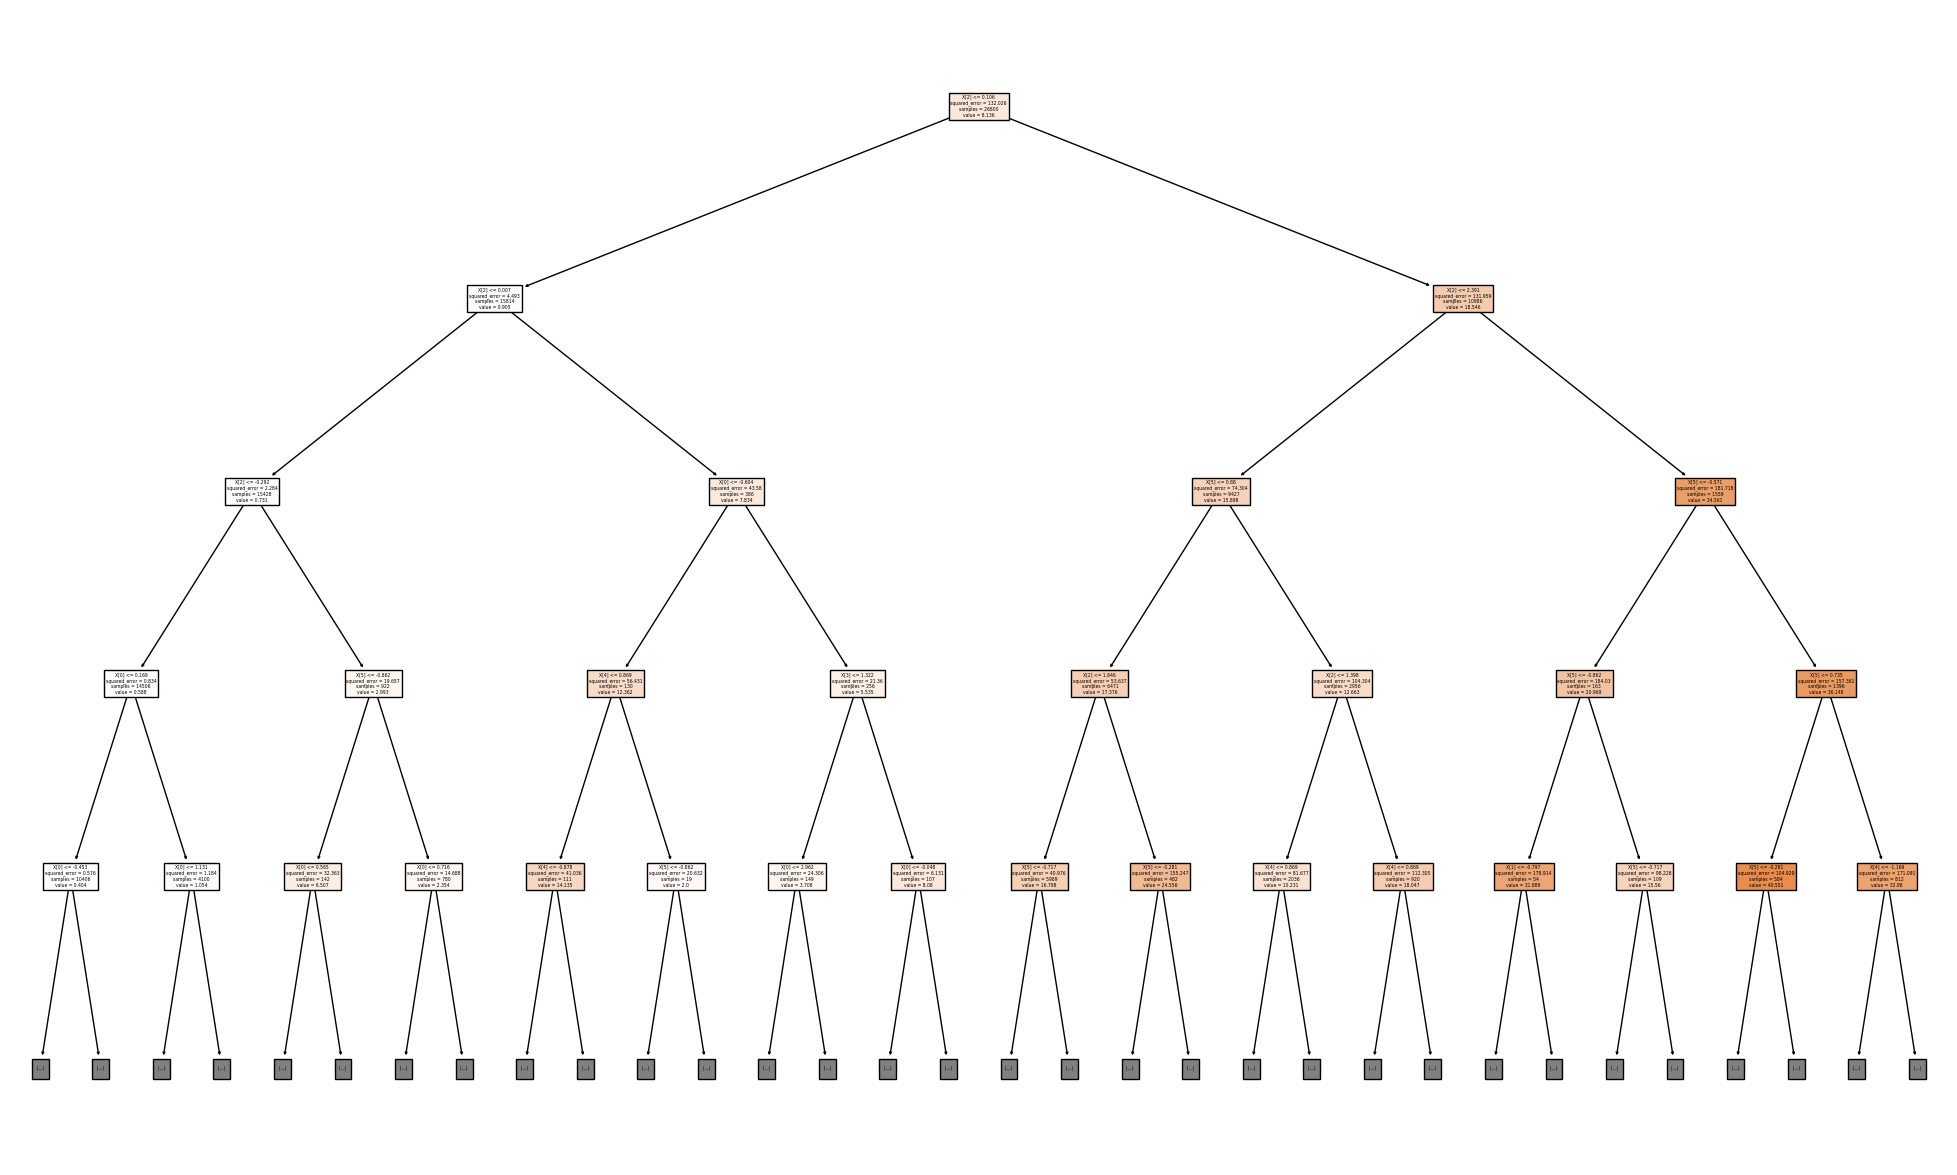

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

## Performance Metrics
R squared and adjusted R square values

In [55]:
from sklearn.metrics import r2_score

In [56]:
r2_score=r2_score(y_test,Y_pred)
print("Decision Tree regression model has {}% accuracy".format(round(r2_score*100,3)))
adj_r2_score=1-((1-r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("It's Adjusted R square accuracy is {} percent".format(round(adj_r2_score*100,2)))


Decision Tree regression model has 70.724% accuracy
It's Adjusted R square accuracy is 70.71 percent


## HyperParameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_param ={
    'criterion':["squared_error"],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [59]:
grid_search= GridSearchCV(estimator=model,param_grid=grid_param, cv=5)

In [62]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [63]:
grid_search.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 4,
 'splitter': 'best'}

In [64]:
#Creating a model with the best parameters
model_with_best_param= DecisionTreeRegressor(criterion= 'squared_error',
 max_depth = 8,
 min_samples_leaf= 9,
 min_samples_split= 4,
 splitter= 'best') 

In [65]:
# train the model
model_with_best_param.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=4)

In [66]:
model_with_best_param.score(X_train,y_train)

0.8310480696831906

In [67]:
y_pred=model_with_best_param.predict(X_test)

In [ ]:
r2_score_lr= r2_score(y_test, y_pred)
print("Decision tree Regression model has {} % accuracy".format(round(r2_score_lr*100,3)))

adjr2_score_lr=1-((1-r2_score_lr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("It's Adjusted R square accuracy is {} percent".format(round(adjr2_score_lr*100,2)))

[Text(0.49378033980582525, 0.9444444444444444, 'X[2] <= 0.106\nsquared_error = 132.026\nsamples = 26800\nvalue = 8.136'),
 Text(0.2671925566343042, 0.8333333333333334, 'X[2] <= 0.007\nsquared_error = 4.493\nsamples = 15814\nvalue = 0.905'),
 Text(0.17637540453074432, 0.7222222222222222, 'X[2] <= -0.292\nsquared_error = 2.284\nsamples = 15428\nvalue = 0.731'),
 Text(0.09911003236245955, 0.6111111111111112, 'X[0] <= 0.169\nsquared_error = 0.834\nsamples = 14506\nvalue = 0.588'),
 Text(0.05177993527508091, 0.5, 'X[0] <= -0.453\nsquared_error = 0.576\nsamples = 10406\nvalue = 0.404'),
 Text(0.025889967637540454, 0.3888888888888889, 'X[4] <= -0.878\nsquared_error = 0.321\nsamples = 5445\nvalue = 0.259'),
 Text(0.012944983818770227, 0.2777777777777778, 'X[2] <= -0.838\nsquared_error = 0.074\nsamples = 1287\nvalue = 0.048'),
 Text(0.006472491909385114, 0.16666666666666666, 'X[3] <= 0.756\nsquared_error = 0.015\nsamples = 737\nvalue = 0.015'),
 Text(0.003236245954692557, 0.05555555555555555, '

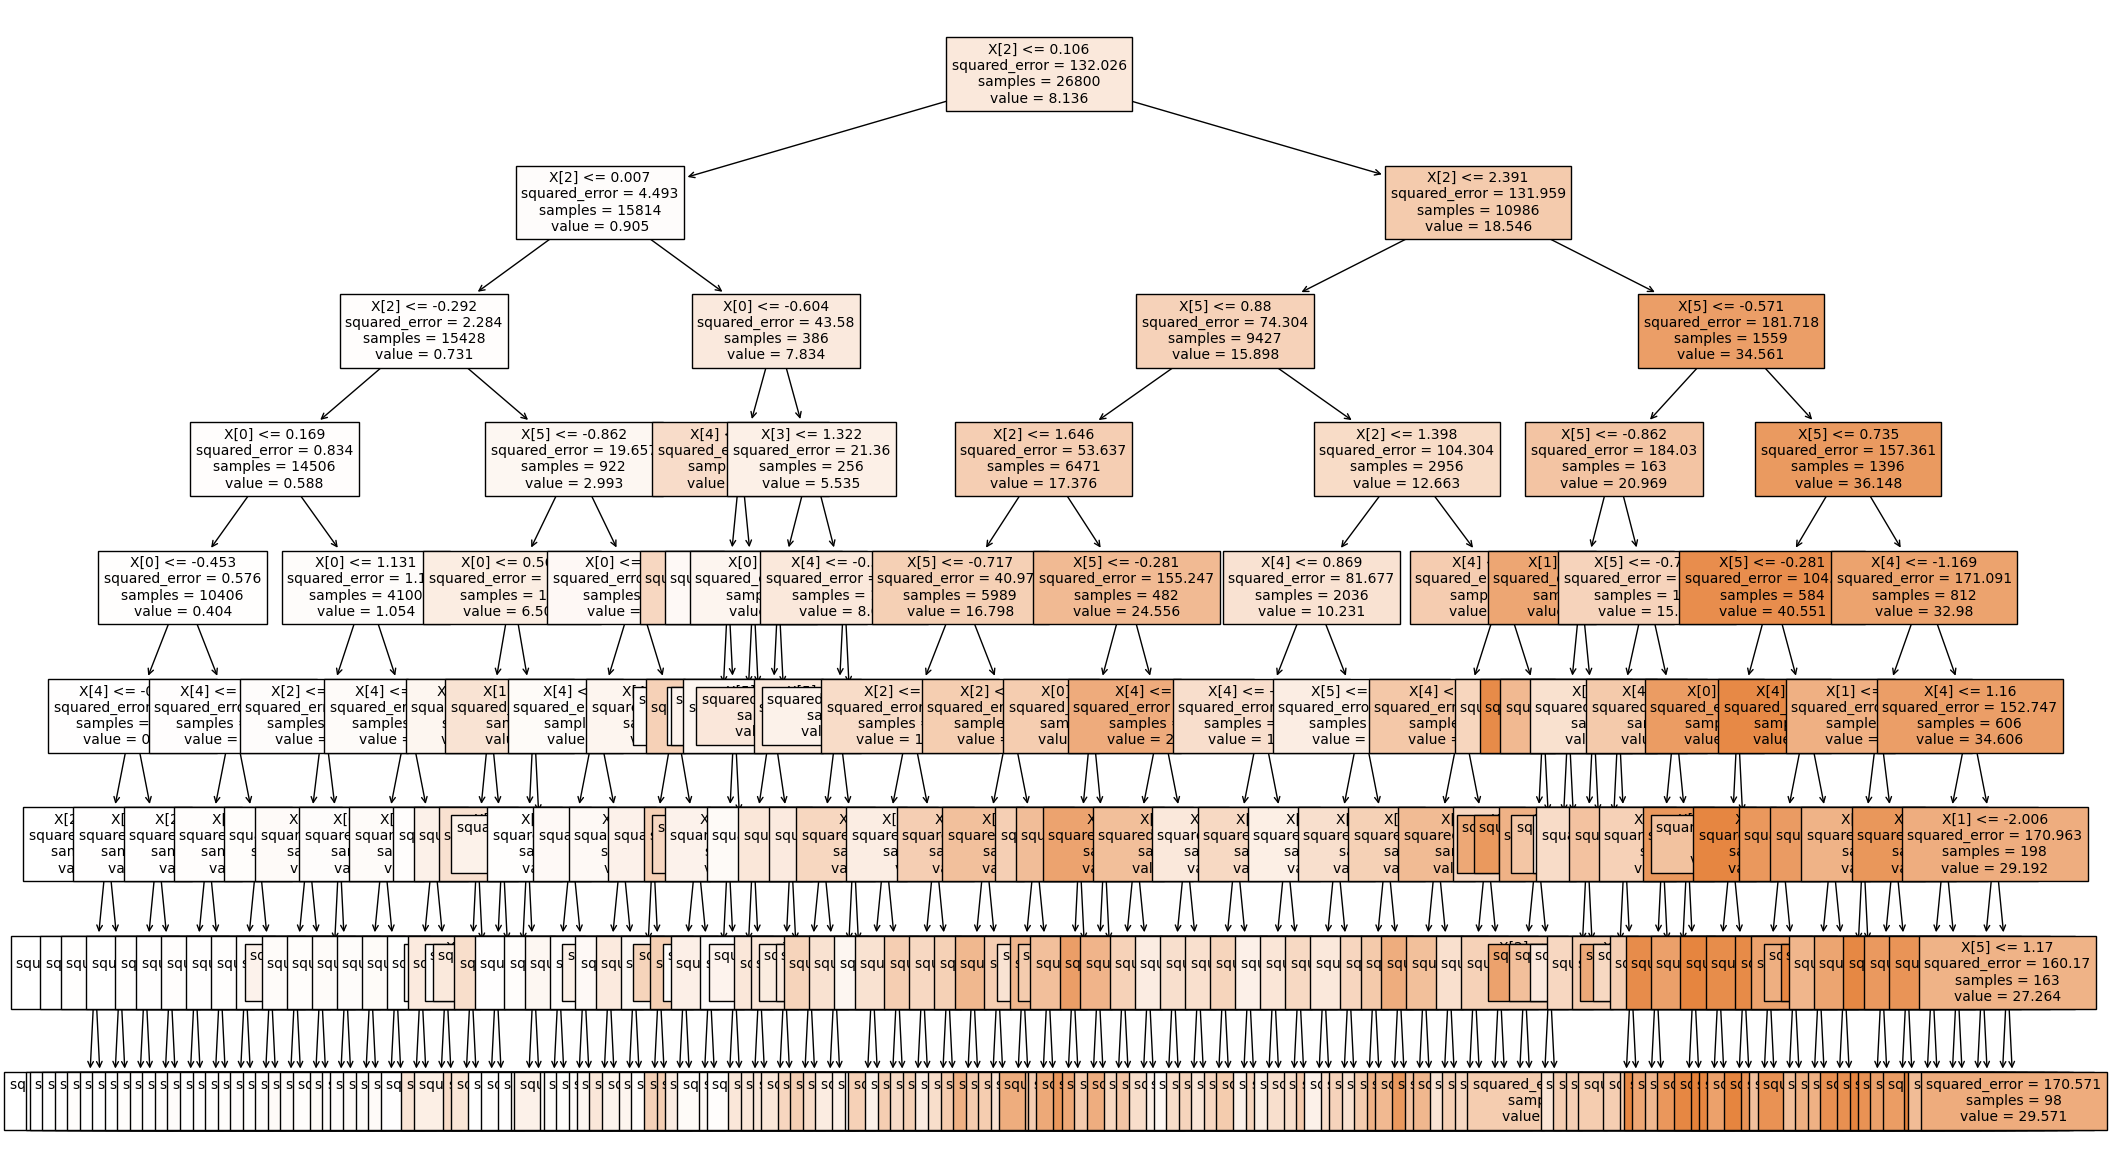

In [69]:
## Plotting the Desicion Tree
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_param,filled=True,fontsize=10)